In [1]:
pip install bing-image-downloader

In [2]:
mkdir images_file

In [3]:
#DataGathering
from bing_image_downloader import downloader
downloader.download('men',limit=50,output_dir='images_file',adult_filter_off=True)
downloader.download('women',limit=50,output_dir='images_file',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 9 Images on Page 1.


[%] Downloading Image #1 from http://ww1.prweb.com/prfiles/2009/10/16/3065214/1_ClipperCuttingBlackMenVol2.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://i1.ytimg.com/vi/SDxs_36E0-k/hqdefault.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/-jLog7vYGp24/Tq0pqAOr-oI/AAAAAAAADJI/d4Kbr_-rPnE/s640/Tattoos+for+Men+%2528sexy+tattoos%2529+9.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://2.bp.blogspot.com/-P5FJLgMqLd0/TbOaccjvtXI/AAAAAAAAJmQ/DRA6YuM-17g/s1600/504946_com_xmen204.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://2.bp.blogspot.com/-zrLvUT19Its/T61eoAs3R0I/AAAAAAAAwZE/83C_oLYo-6A/s1600/Women+live+longer+0032.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://2.bp.blogspot.com/_RyZGUge64_g/TBTaAe4GTYI/AAAAAAAAA5g/v0BsMap6DdA/s1600/zara-men-sep-2009-07.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://health101.org/misc

<BarContainer object of 2 artists>

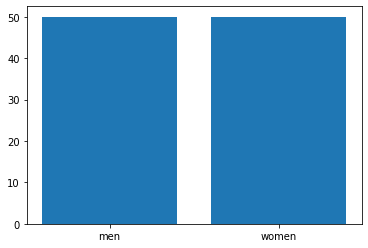

In [4]:
#Preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images_file = []
flat_data = []

DATADIR ='/content/images_file'
CATEGORIES = ['men','women']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  #print(class_num)
  path = os.path.join(DATADIR, category)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array)
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images_file.append(img_resized)
    target.append(class_num)
    
flat_data = np.array(flat_data)
target = np.array(target)
images_file = np.array(images_file)

unique, count = np.unique(target, return_counts=True)

plt.bar(CATEGORIES, count)

In [5]:
#split data into training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data, target, test_size=0.33,random_state=45)

In [6]:
#Applying Classification Algoritham SVM
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000], 'kernel':['linear']},
              {'C':[1,10,100,1000], 'gamma':[0.001,0.0001],'kernel':['rbf']},
]
svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

print(y_pred)
print(y_test)

[0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0]
[0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0]


In [7]:
#Evaluation of  Confusion Matrix and classification report
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))
print(classification_report(y_pred,y_test))

1.0
[[19  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        14

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



enter your urlhttps://openthemagazine.com/wp-content/uploads/2019/03/AHero1.jpg
(667, 1000, 3)
PREDICTED OUTPUT\:men


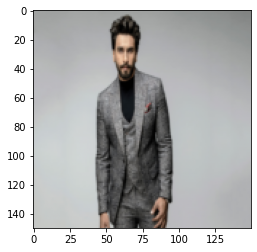

In [11]:
#Prediction of New Image
import pickle
pickle.dump(clf,open('img_model.p','wb'))

model = pickle.load(open('img_model.p','rb'))

flat_data = []
url = input('enter your url')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT\:{y_out}')